['',
 'Users',
 'matthewchuang',
 'opt',
 'anaconda3',
 'envs',
 'yahoo_finance',
 'bin',
 'python']

In [1]:
import pandas as pd
# ncs csx
df1=pd.read_csv("/Users/matthewchuang/Documents/GitHub/algo_test/datas/20210105/daily/NSC.csv").close
df2=pd.read_csv("/Users/matthewchuang/Documents/GitHub/algo_test/datas/20210105/daily/CSX.csv").close

In [3]:
from helper import find_Return

ret1 = find_Return(df1)
ret2 = find_Return(df2)

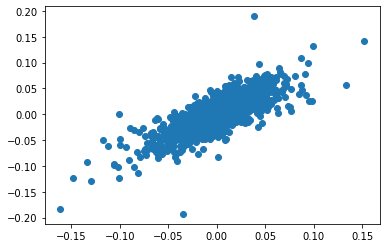

In [5]:
import matplotlib.pyplot as plt
plt.plot(ret1,ret2,"o")

In [4]:
%matplotlib inline
from copulas.visualization import compare_1d

compare_1d(ret1, ret2)

In [5]:
from copulas.univariate import Univariate

univariate = Univariate()
univariate.fit(ret1)
parameters = univariate.to_dict()
parameters


{'df': 3.270812678385875,
 'loc': 0.0007305123829057037,
 'scale': 0.013578077245208153,
 'type': 'copulas.univariate.student_t.StudentTUnivariate'}

In [6]:
from copulas.multivariate import GaussianMultivariate

dist = GaussianMultivariate()
dist.fit(data)

NameError: name 'data' is not defined

In [10]:
df = pd.concat([ret1,ret2],axis=1)
mean_ =df.std()
mean_

close    0.020606
close    0.020840
dtype: float64

In [9]:
import numpy as np

In [41]:
from copulas.bivariate import Bivariate
from copulas.multivariate import GaussianMultivariate
from statsmodels.distributions.empirical_distribution import ECDF
model = Bivariate()
X = ECDF(df.iloc[:,0])(df.iloc[:,0])
Y = ECDF(df.iloc[:,1])(df.iloc[:,1])
Z = np.vstack((X,Y)).T

K = model.select_copula(Z)
K.partial_derivative(Z[:,:])[-1:]

array([0.81513942, 0.44008788, 0.66924481, 0.91227322, 0.63389887,
       0.75602697, 0.46425449, 0.46501412, 0.68241005, 0.55507829])

In [44]:
K.partial_derivative(Z[-1:,:])

array([0.55507829])

In [142]:
Q = K.partial_derivative(Z)
Q

array([0.27244675, 0.00991441, 0.0043994 , ..., 0.46501412, 0.68241005,
       0.55507829])

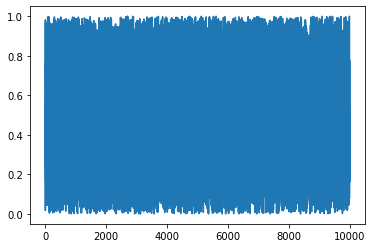

In [149]:
K_ = K.sample(10000)
plt.plot(K_[:,0])

In [147]:
from scipy.stats import kendalltau
tau = kendalltau(X,Y)[0]

theta = 1 / (1 - tau)
A = (-np.log(X)) ** theta + (-np.log(Y)) ** theta
C = np.exp(-A ** (1 / theta))
        # pdf = c * (U * V) ** (-1) * (A ** (-2 + 2 / theta)) * ((np.log(U) * np.log(V)) ** (theta - 1)) * (1 + (theta - 1) * A ** (-1 / theta))
cuv = C * (((- np.log(X))**theta + (-np.log(Y))**theta) ** ((1-theta)/theta)) * (-np.log(Y))**(theta-1) / Y
    # misprice index of y given x = cvu   
cuv


array([0.27244675, 0.00991441, 0.0043994 , ..., 0.46501412, 0.68241005,
       0.55507829])

In [72]:
create_synthetic(ret1,ret2)

IndexError: index 1 is out of bounds for axis 1 with size 1

In [11]:
from markovfsm import Chain
from markovfsm.plot import transitions_to_graph

  Using cached markovfsm-0.2-py2.py3-none-any.whl
